In [ ]:
pip install fugashi[unidic-lite]

     |████████████████████████████████| 568 kB 15.5 MB/s 
     |████████████████████████████████| 47.4 MB 2.2 MB/s 
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658836 sha256=419eaebdfd6edeca70c5d1ab667428e764956add8d91384a18a6f2d7a9a899c0
  Stored in directory: /root/.cache/pip/wheels/de/69/b1/112140b599f2b13f609d485a99e357ba68df194d2079c5b1a2
Successfully built unidic-lite


In [ ]:
pip install -U d2l

     |████████████████████████████████| 82 kB 797 kB/s 
     |████████████████████████████████| 61 kB 10.3 MB/s 
     |████████████████████████████████| 9.9 MB 72.5 MB/s 
     |████████████████████████████████| 15.7 MB 41.7 MB/s 
     |████████████████████████████████| 11.2 MB 28.6 MB/s 
     |████████████████████████████████| 930 kB 42.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's depend

In [ ]:
pip install datasets

     |████████████████████████████████| 325 kB 14.3 MB/s 
     |████████████████████████████████| 136 kB 73.6 MB/s 
     |████████████████████████████████| 77 kB 9.1 MB/s 
     |████████████████████████████████| 1.1 MB 68.5 MB/s 
     |████████████████████████████████| 212 kB 75.8 MB/s 
     |████████████████████████████████| 138 kB 59.8 MB/s 
     |████████████████████████████████| 144 kB 53.7 MB/s 
     |████████████████████████████████| 271 kB 59.1 MB/s 
     |████████████████████████████████| 94 kB 1.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.25.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you

In [ ]:
pip install matplotlib==3.0.0

     |████████████████████████████████| 12.8 MB 11.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires matplotlib!=3.0.0,>=2.0.2, but you have matplotlib 3.0.0 which is incompatible.
scikit-image 0.18.3 requires matplotlib!=3.0.0,>=2.0.0, but you have matplotlib 3.0.0 which is incompatible.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.0 which is incompatible.
mizani 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.0 which is incompatible.
d2l 0.17.5 requires matplotlib==3.5.1, but you have matplotlib 3.0.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import math
import pandas as pd 
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
from datasets import load_dataset
dataset = load_dataset('bsd_ja_en', ignore_verifications=True)

Using custom data configuration default


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2120 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2051 [00:00<?, ? examples/s]

Dataset bsd_ja_en downloaded and prepared to /root/.cache/huggingface/datasets/bsd_ja_en/default/1.0.0/584d1d2fee129f4799fccf10cb83c7cc0a7e6147094435909c3932c4380ddb24. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
train_data = [dataset['train']['ja_sentence'],dataset['train']['en_sentence']]
test_data = [dataset['test']['ja_sentence'], dataset['test']['en_sentence']]
validation_data = [dataset['validation']['ja_sentence'], dataset['validation']['en_sentence']]

In [ ]:
import fugashi
def jnp_tokenize(jnp_text):
  source = []
  tagger = fugashi.Tagger()
  for line in jnp_text:
    sentence = []
    for word in tagger(line.lower()):
      sentence.append(str(word))
    source.append(sentence)
  return source
def eng_tokenize(eng_text):
  target = []
  for line in eng_text:
    tempt = line.lower().split(' ')
    target.append(tempt)
  return target
source = jnp_tokenize(train_data[0])
target = eng_tokenize(train_data[1])
source[:5], target[:5]

([['はい', '、', 'k', '社', 'システム', '開発', '部', 'です', '。'],
  ['h', '社', 'の', '高市', 'と', '申し', 'ます', '。'],
  ['いつ', 'も', 'お', '世話', 'に', 'なっ', 'て', 'おり', 'ます', '。'],
  ['こちら', 'こそ', '、', 'お', '世話', 'に', 'なっ', 'て', 'おり', 'ます', '。'],
  ['稲田', 'さん', 'は', 'いらっしゃい', 'ます', 'か', '？']],
 [['hi',
   'this',
   'is',
   'the',
   'systems',
   'development',
   'department',
   'of',
   'company',
   'k.'],
  ['my', 'name', 'is', 'takaichi', 'from', 'company', 'h.'],
  ['thank', 'you', 'as', 'always.'],
  ['thank', 'you', 'as', 'always', 'as', 'well.'],
  ['is', 'inada-san', 'there?']])

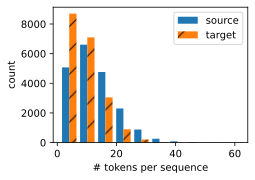

In [ ]:
def show_list_len_pair_hist(legend, xlabel, ylabel, xlist, ylist):
    """draw graph for lengths for source and target sentences"""
    d2l.set_figsize()
    _, _, patches = d2l.plt.hist(
        [[len(l) for l in xlist], [len(l) for l in ylist]])
    d2l.plt.xlabel(xlabel)
    d2l.plt.ylabel(ylabel)
    for patch in patches[1].patches:
        patch.set_hatch('/')
    d2l.plt.legend(legend)

show_list_len_pair_hist(['source', 'target'], '# tokens per sequence',
                        'count', source, target);

In [ ]:
def truncate_pad(line, num_steps, padding_token):
    """truncate or pad text"""
    if len(line) > num_steps:
        return line[:num_steps]  # 截断
    return line + [padding_token] * (num_steps - len(line))  # 填充

In [ ]:
def build_array_nmt(lines, vocab, num_steps):
    """transform the long sentence into individual pieces"""
    lines = [vocab[l] for l in lines]
    lines = [l + [vocab['<eos>']] for l in lines]
    array = torch.tensor([truncate_pad(
        l, num_steps, vocab['<pad>']) for l in lines])
    valid_len = (array != vocab['<pad>']).type(torch.int32).sum(1)
    return array, valid_len

In [ ]:
def load_data_nmt_jp(train_text, validation_text, test_text, batch_size, num_steps, num_examples=600):
    """We want a multilingual transformer so we add a eng - eng dataset to learn English word in transformer"""
    source, target = jnp_tokenize(train_text[0]), eng_tokenize(train_text[1])
    # the valid and test dataset do not need to add a eng-eng dataset
    valid_source, valid_target = jnp_tokenize(validation_text[0]), eng_tokenize(validation_text[1])
    test_source, test_target = jnp_tokenize(test_text[0]), eng_tokenize(test_text[1])

    #Adding padding, beginning of the setence and end of the sentence into the source and target token set
    src_vocab = d2l.Vocab(source, min_freq=2,
                          reserved_tokens=['<pad>', '<bos>', '<eos>'])
    tgt_vocab = d2l.Vocab(target, min_freq=3,
                          reserved_tokens=['<pad>', '<bos>', '<eos>'])

    #Transform the source and target sentences into individual words and return the valid length
    src_array, src_valid_len = build_array_nmt(source, src_vocab, num_steps)
    tgt_array, tgt_valid_len = build_array_nmt(target, tgt_vocab, num_steps)


    src_validation_array, src_validation_valid_len = build_array_nmt(valid_source, src_vocab, num_steps)
    tgt_validation_array, tgt_validation_valid_len = build_array_nmt(valid_target, tgt_vocab, num_steps)

    src_test_array, src_test_valid_len = build_array_nmt(test_source, src_vocab, num_steps)
    tgt_test_array, tgt_test_valid_len = build_array_nmt(test_target, tgt_vocab, num_steps)

    data_arrays = (src_array, src_valid_len, tgt_array, tgt_valid_len)

    data_validation_arrays = (src_validation_array, src_validation_valid_len, tgt_validation_array, tgt_validation_valid_len)


    data_test_arrays = (src_test_array, src_test_valid_len, tgt_test_array, tgt_test_valid_len)
    
    # Build the iteration method with shuffle is true
    train_iter = d2l.load_array(data_arrays, batch_size)
    validation_iter = d2l.load_array(data_validation_arrays, batch_size)
    test_iter = d2l.load_array(data_test_arrays, batch_size)
    return train_iter, validation_iter, test_iter,src_vocab, tgt_vocab

In [ ]:
def load_data_nmt_en(train_text, validation_text, test_text, batch_size, num_steps, num_examples=600):
    """We want a multilingual transformer so we add a eng - eng dataset to learn English word in transformer"""
    source, target = jnp_tokenize(train_text[1]), eng_tokenize(train_text[1])
    # the valid and test dataset do not need to add a eng-eng dataset
    valid_source, valid_target = jnp_tokenize(validation_text[0]), eng_tokenize(validation_text[1])
    test_source, test_target = jnp_tokenize(test_text[0]), eng_tokenize(test_text[1])

    #Adding padding, beginning of the setence and end of the sentence into the source and target token set
    src_vocab = d2l.Vocab(source, min_freq=2,
                          reserved_tokens=['<pad>', '<bos>', '<eos>'])
    tgt_vocab = d2l.Vocab(target, min_freq=3,
                          reserved_tokens=['<pad>', '<bos>', '<eos>'])

    #Transform the source and target sentences into individual words and return the valid length
    src_array, src_valid_len = build_array_nmt(source, src_vocab, num_steps)
    tgt_array, tgt_valid_len = build_array_nmt(target, tgt_vocab, num_steps)


    src_validation_array, src_validation_valid_len = build_array_nmt(valid_source, src_vocab, num_steps)
    tgt_validation_array, tgt_validation_valid_len = build_array_nmt(valid_target, tgt_vocab, num_steps)

    src_test_array, src_test_valid_len = build_array_nmt(test_source, src_vocab, num_steps)
    tgt_test_array, tgt_test_valid_len = build_array_nmt(test_target, tgt_vocab, num_steps)

    data_arrays = (src_array, src_valid_len, tgt_array, tgt_valid_len)

    data_validation_arrays = (src_validation_array, src_validation_valid_len, tgt_validation_array, tgt_validation_valid_len)


    data_test_arrays = (src_test_array, src_test_valid_len, tgt_test_array, tgt_test_valid_len)
    
    # Build the iteration method with shuffle is true
    train_iter = d2l.load_array(data_arrays, batch_size)
    validation_iter = d2l.load_array(data_validation_arrays, batch_size)
    test_iter = d2l.load_array(data_test_arrays, batch_size)
    return train_iter, validation_iter, test_iter,src_vocab, tgt_vocab

In [ ]:
train_iter, vlidation_iter, test_iter, source_vocab, target_vocab = load_data_nmt_jp(train_data, validation_data, test_data, 2, 10)
for X, X_valid_len, Y, Y_valid_len in train_iter:
    print('X:', X.type(torch.int32))
    print('X的有效长度:', X_valid_len)
    print('Y:', Y.type(torch.int32))
    print('Y的有效长度:', Y_valid_len)
    break

X: tensor([[ 51, 259,   8,  61,   7, 132,  31,   6, 361,  14],
        [ 41,  16, 178,   9,  40,  16,  26,  19,   3,   1]], dtype=torch.int32)
X的有效长度: tensor([10,  9])
Y: tensor([[ 161,   43,    5,  277,   28, 2897,   23,  253,    3,    1],
        [  25,    7,   18,   81, 1241,    3,    1,    1,    1,    1]],
       dtype=torch.int32)
Y的有效长度: tensor([9, 6])


In [ ]:
class PositionWiseFFN(nn.Module):
  def __init__(self, ffn_num_input, ffn_num_hiddens, ffn_num_outputs, **kwargs):
    super(PositionWiseFFN, self).__init__(**kwargs)
    self.dense1 = nn.Linear(ffn_num_input, ffn_num_hiddens)
    self.relu = nn.ReLU()
    self.dense2 = nn.Linear(ffn_num_hiddens, ffn_num_outputs)
  
  def forward(self, X):
    return self.dense2(self.relu(self.dense1(X)))

In [ ]:
class AddNorm(nn.Module):
  def __init__(self, normalized_shape, dropout, **kwargs):
    super(AddNorm, self).__init__(**kwargs)
    self.dropout = nn.Dropout(dropout)
    self.ln = nn.LayerNorm(normalized_shape)
  
  def forward(self, X, Y):
    return self.ln(self.dropout(Y) + X)

In [ ]:
class EncoderBlock(nn.Module):
  def __init__(self,key_size, query_size, value_size, num_hiddens,
               norm_shape, ffn_num_input, ffn_num_hiddens, num_heads,
               dropout, use_bias = False, **kwargs):
    super(EncoderBlock, self).__init__(**kwargs)
    self.attention = d2l.MultiHeadAttention(
        key_size, query_size, value_size, num_hiddens, num_heads, dropout, 
        use_bias)
    self.addnorm1 = AddNorm(norm_shape, dropout)
    self.ffn = PositionWiseFFN(
        ffn_num_input, ffn_num_hiddens, num_hiddens)
    self.addnorm2 = AddNorm(norm_shape, dropout)
  
  def forward(self, X, valid_lens):
    Y = self.addnorm1(X, self.attention(X, X, X, valid_lens))
    return self.addnorm2(Y, self.ffn(Y))    

In [ ]:
class TransformerEncoder(d2l.Encoder):
  def __init__(self, vocab_size, key_size, query_size, value_size, 
               num_hiddens, norm_shape, ffn_num_inputs, ffn_num_hiddens, 
               num_heads, num_layers, dropout, use_bias = False, **kwargs):
    super(TransformerEncoder, self).__init__(**kwargs)
    self.num_hiddens = num_hiddens
    self.embedding = nn.Embedding(vocab_size, num_hiddens)
    self.pos_encoding = d2l.PositionalEncoding(num_hiddens, dropout)
    self.blks = nn.Sequential()
    for i in range(num_layers):
      self.blks.add_module('block' + str(i),
                           EncoderBlock(key_size, query_size, value_size, num_hiddens,
                                        norm_shape, ffn_num_inputs, ffn_num_hiddens,
                                        num_heads, dropout, use_bias))
  
  def forward(self, X, valid_lens, *args):
    X = self.pos_encoding(self.embedding(X) * math.sqrt(self.num_hiddens))
    self.attention_weights = [None] * len(self.blks)
    for i, blk in enumerate(self.blks):
      X = blk(X, valid_lens)
      self.attention_weights[i] = blk.attention.attention.attention_weights
    return X


In [ ]:
class DecoderBlock(nn.Module):
    """解码器中第i个块"""
    def __init__(self, key_size, query_size, value_size, num_hiddens,
                 norm_shape, ffn_num_input, ffn_num_hiddens, num_heads,
                 dropout, i, **kwargs):
        super(DecoderBlock, self).__init__(**kwargs)
        self.i = i
        self.attention1 = d2l.MultiHeadAttention(
            key_size, query_size, value_size, num_hiddens, num_heads, dropout)
        self.addnorm1 = AddNorm(norm_shape, dropout)
        self.attention2 = d2l.MultiHeadAttention(
            key_size, query_size, value_size, num_hiddens, num_heads, dropout)
        self.addnorm2 = AddNorm(norm_shape, dropout)
        self.ffn = PositionWiseFFN(ffn_num_input, ffn_num_hiddens,
                                   num_hiddens)
        self.addnorm3 = AddNorm(norm_shape, dropout)

    def forward(self, X, state):
        enc_outputs, enc_valid_lens = state[0], state[1]
        # 训练阶段，输出序列的所有词元都在同一时间处理，
        # 因此state[2][self.i]初始化为None。
        # 预测阶段，输出序列是通过词元一个接着一个解码的，
        # 因此state[2][self.i]包含着直到当前时间步第i个块解码的输出表示
        if state[2][self.i] is None:
            key_values = X
        else:
            key_values = torch.cat((state[2][self.i], X), axis=1)
        state[2][self.i] = key_values
        if self.training:
            batch_size, num_steps, _ = X.shape
            # dec_valid_lens的开头:(batch_size,num_steps),
            # 其中每一行是[1,2,...,num_steps]
            dec_valid_lens = torch.arange(
                1, num_steps + 1, device=X.device).repeat(batch_size, 1)
        else:
            dec_valid_lens = None

        # 自注意力
        X2 = self.attention1(X, key_values, key_values, dec_valid_lens)
        Y = self.addnorm1(X, X2)
        # 编码器－解码器注意力。
        # enc_outputs的开头:(batch_size,num_steps,num_hiddens)
        Y2 = self.attention2(Y, enc_outputs, enc_outputs, enc_valid_lens)
        Z = self.addnorm2(Y, Y2)
        return self.addnorm3(Z, self.ffn(Z)), state

In [ ]:
class TransformerDecoder(d2l.AttentionDecoder):
    def __init__(self, vocab_size, key_size, query_size, value_size,
                 num_hiddens, norm_shape, ffn_num_input, ffn_num_hiddens,
                 num_heads, num_layers, dropout, **kwargs):
        super(TransformerDecoder, self).__init__(**kwargs)
        self.num_hiddens = num_hiddens
        self.num_layers = num_layers
        self.embedding = nn.Embedding(vocab_size, num_hiddens)
        self.pos_encoding = d2l.PositionalEncoding(num_hiddens, dropout)
        self.blks = nn.Sequential()
        for i in range(num_layers):
            self.blks.add_module("block"+str(i),
                DecoderBlock(key_size, query_size, value_size, num_hiddens,
                             norm_shape, ffn_num_input, ffn_num_hiddens,
                             num_heads, dropout, i))
        self.dense = nn.Linear(num_hiddens, vocab_size)

    def init_state(self, enc_outputs, enc_valid_lens, *args):
        return [enc_outputs, enc_valid_lens, [None] * self.num_layers]

    def forward(self, X, state):
        X = self.pos_encoding(self.embedding(X) * math.sqrt(self.num_hiddens))
        self._attention_weights = [[None] * len(self.blks) for _ in range (2)]
        for i, blk in enumerate(self.blks):
            X, state = blk(X, state)
            # 解码器自注意力权重
            self._attention_weights[0][
                i] = blk.attention1.attention.attention_weights
            # “编码器－解码器”自注意力权重
            self._attention_weights[1][
                i] = blk.attention2.attention.attention_weights
        return self.dense(X), state

    @property
    def attention_weights(self):
        return self._attention_weights

In [ ]:
num_hiddens, num_layers, dropout, batch_size, num_steps = 32, 2, 0.1, 32, 15
lr, num_epochs, device = 0.005, 200, d2l.try_gpu()
ffn_num_input, ffn_num_hiddens, num_heads = 32, 64, 4
key_size, query_size, value_size = 32, 32, 32
norm_shape = [32]

train_iter, validation_iter, test_iter, src_vocab, tgt_vocab= load_data_nmt_jp(train_data, validation_data, test_data, batch_size, num_steps)

encoder = TransformerEncoder(
    len(src_vocab), key_size, query_size, value_size, num_hiddens,
    norm_shape, ffn_num_input, ffn_num_hiddens, num_heads,
    num_layers, dropout)
decoder = TransformerDecoder(
    len(tgt_vocab), key_size, query_size, value_size, num_hiddens,
    norm_shape, ffn_num_input, ffn_num_hiddens, num_heads,
    num_layers, dropout)
net = d2l.EncoderDecoder(encoder, decoder).cuda()

In [ ]:
num_hiddens, num_layers, dropout, batch_size, num_steps = 32, 2, 0.1, 32, 15
lr, num_epochs, device = 0.005, 200, d2l.try_gpu()
ffn_num_input, ffn_num_hiddens, num_heads = 32, 64, 4
key_size, query_size, value_size = 32, 32, 32
norm_shape = [32]

train_iter, validation_iter, test_iter, src_vocab, tgt_vocab= load_data_nmt_en(train_data, validation_data, test_data, batch_size, num_steps)

encoder = TransformerEncoder(
    len(src_vocab), key_size, query_size, value_size, num_hiddens,
    norm_shape, ffn_num_input, ffn_num_hiddens, num_heads,
    num_layers, dropout)
decoder = TransformerDecoder(
    len(tgt_vocab), key_size, query_size, value_size, num_hiddens,
    norm_shape, ffn_num_input, ffn_num_hiddens, num_heads,
    num_layers, dropout)
net1 = d2l.EncoderDecoder(encoder, decoder).cuda()

loss 0.065, 10506.0 tokens/sec on cuda:0


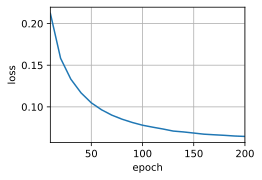

In [ ]:
d2l.train_seq2seq(net1, train_iter, lr, num_epochs, tgt_vocab, device)

loss 0.217, 11012.9 tokens/sec on cuda:0


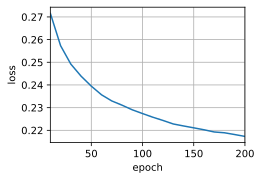

In [ ]:
d2l.train_seq2seq(net, train_iter, lr, num_epochs, tgt_vocab, device)

In [ ]:
def predict_seq2seq(net, src_sentence, src_vocab, tgt_vocab, num_steps,
                    device, save_attention_weights=False):
    """Predict for sequence to sequence.

    Defined in :numref:`sec_seq2seq_training`"""
    # Set `net` to eval mode for inference
    net.eval()
    src_tokens = jnp_tokenize(src_sentence)
    src_tokens, _ = build_array_nmt(src_tokens, src_vocab, num_steps)
    src_tokens = src_tokens.view(num_steps)
    enc_valid_len = torch.tensor([len(src_tokens)], device=device)
    # Add the batch axis
    enc_X = torch.unsqueeze(
        torch.tensor(src_tokens, dtype=torch.long, device=device), dim=0)
    

    enc_outputs = net.encoder(enc_X, enc_valid_len)
    dec_state = net.decoder.init_state(enc_outputs, enc_valid_len)
    # Add the batch axis
    dec_X = torch.unsqueeze(torch.tensor(
        [tgt_vocab['<bos>']], dtype=torch.long, device=device), dim=0)
    output_seq, attention_weight_seq = [], []
    for _ in range(num_steps):
        Y, dec_state = net.decoder(dec_X, dec_state)
        # We use the token with the highest prediction likelihood as the input
        # of the decoder at the next time step
        dec_X = Y.argmax(dim=2)
        pred = dec_X.squeeze(dim=0).type(torch.int32).item()
        # Save attention weights (to be covered later)
        if save_attention_weights:
            attention_weight_seq.append(net.decoder.attention_weights)
        # Once the end-of-sequence token is predicted, the generation of the
        # output sequence is complete
        if pred == tgt_vocab['<eos>']:
            break
        output_seq.append(pred)
    return ' '.join(tgt_vocab.to_tokens(output_seq)), attention_weight_seq


In [ ]:
import collections
def bleu(pred_seq, label_seq, k):
    """Compute the BLEU.

    Defined in :numref:`sec_seq2seq_training`"""
    pred_tokens, label_tokens = pred_seq.split(' '), label_seq.split(' ')
    len_pred, len_label = len(pred_tokens), len(label_tokens)
    score = math.exp(min(0, 1 - len_label / len_pred))
    for n in range(1, k + 1):
        num_matches, label_subs = 0, collections.defaultdict(int)
        for i in range(len_label - n + 1):
            label_subs[' '.join(label_tokens[i: i + n])] += 1
        for i in range(len_pred - n + 1):
            if label_subs[' '.join(pred_tokens[i: i + n])] > 0:
                num_matches += 1
                label_subs[' '.join(pred_tokens[i: i + n])] -= 1
        if(len_pred - n + 1==0):
          score *= math.pow(num_matches / 1, math.pow(0.5, n))
        else:
          score *= math.pow(num_matches / (len_pred - n + 1), math.pow(0.5, n))
    return score

In [ ]:
BLEU = 0
for idx in range(len(test_data[0])):
  translation, _ = predict_seq2seq(net,[test_data[1][idx]], src_vocab, tgt_vocab, num_steps, device, True)
  manuel_translation = test_data[1][idx].lower()
  BLEU += bleu(translation, manuel_translation, k=2)

    
BLEU = BLEU / len(test_data[1]) * 100
print(BLEU)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


0.8456799165305716


In [ ]:
for idx in range(10):
  translation, y = predict_seq2seq(net1,[train_data[1][idx]], src_vocab, tgt_vocab, num_steps, device, True)
  manuel_translation = train_data[1][idx].lower()
  print(translation,',', manuel_translation)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


invoice is the development department of company k. , hi this is the systems development department of company k.
invoice where is takaichi from company h. , my name is takaichi from company h.
invoice once always. , thank you as always.
invoice where you as well. , thank you as always as well.
invoice where is there? , is inada-san there?
it seems i got a call from him around 1 hour ago. , it seems i got a call from him around 1 hour ago.
issue me let you switch over. , yes, let me switch you over.
invoice once a moment. , please wait a moment.
<unk> you have a call from h at company h. , inada-san, you have a call from mr. takaichi of company h.
invoice once is <unk> , hello, this is inada.


In [ ]:
from google.colab import files
torch.save(net.state_dict(), '/content/drive/MyDrive/Colab Notebooks/translation_jp.pt')
torch.save(net1.state_dict(), '/content/drive/MyDrive/Colab Notebooks/translation_en.pt')

In [ ]:
from google.colab import files
device = d2l.try_gpu()
model = d2l.EncoderDecoder(encoder, decoder)
model_path = '/content/drive/MyDrive/Colab Notebooks/translation_jp.pt'
model.load_state_dict(torch.load(model_path, map_location=device), strict=False)

<All keys matched successfully>